In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Definición de constantes y parámetros del problema

In [3]:
c = 299792458.0

f0 = 1e9
er1 = 1
er2 = 16.0
ert = 4.0

eps0 = 8.854e-12
eps1 = 8.854e-12
eps2 = er1 * eps0
epst = np.sqrt(eps1 * eps2)

eta0 = 120 * np.pi
eta1 = eta0 / np.sqrt(er1)  
eta2 = eta0 / np.sqrt(er2)  
etat = eta0 / np.sqrt(ert)

# Lambda en la lámina a f0
lambda_m0 = c / (f0 * np.sqrt(epst / eps0))

# Espesor de la lámina (cuarto de onda)
d = lambda_m0 / 4


# Parte a

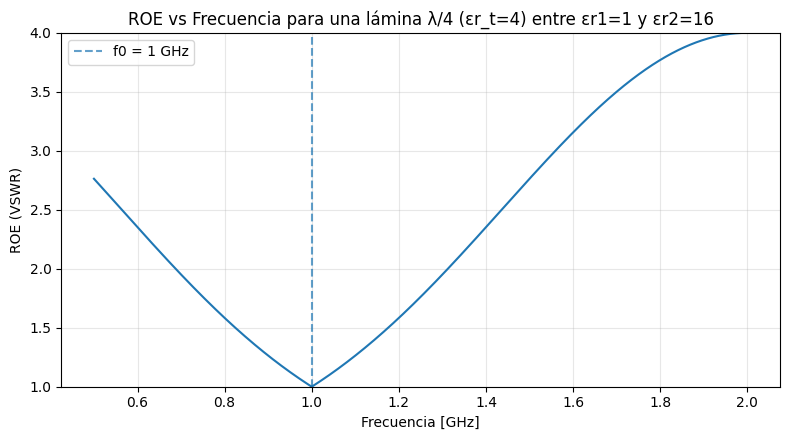

In [9]:
f = np.linspace(f0/2, 2*f0, 2001) 

beta_d = (np.pi/2.0) * (f / f0)
tan_bd = np.tan(beta_d)

Zin = etat * (eta2 + 1j * etat * tan_bd) / (etat + 1j * eta2 * tan_bd)

Gamma = (Zin - eta1) / (Zin + eta1)

ROE = (1 + np.abs(Gamma)) / (1 - np.abs(Gamma))

# Graficar ROE vs frecuencia
plt.figure(figsize=(8, 4.5))
plt.plot(f/1e9, ROE)
plt.axvline(f0/1e9, linestyle='--', alpha=0.7, label='f0 = 1 GHz')
plt.ylim(1, min(5, np.nanmax(ROE)))   
plt.xlabel('Frecuencia [GHz]')
plt.ylabel('ROE (VSWR)')
plt.title('ROE vs Frecuencia para una lámina λ/4 (εr_t=4) entre εr1=1 y εr2=16')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



# Parte b

f1 = 0.825 GHz
f2 = 1.175 GHz
BW = 350.2 MHz  (35.02% de f0)


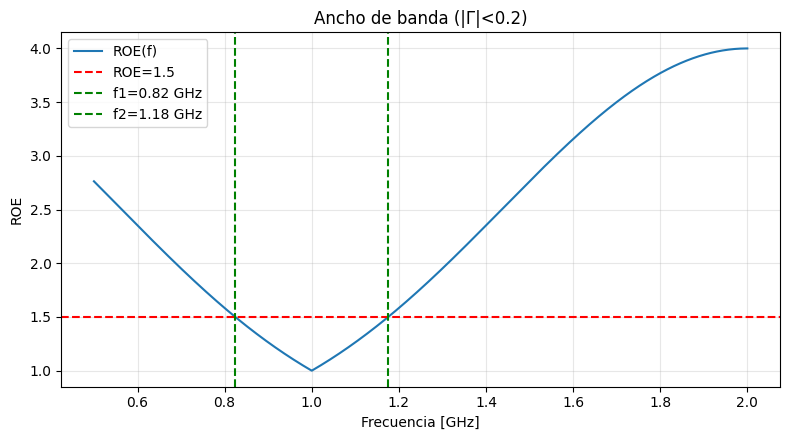

In [10]:
umbral_ROE = 1.5  # |Γ|<0.2  <=>  ROE<1.5
mask = ROE < umbral_ROE
idx = np.where(mask)[0]
splits = np.where(np.diff(idx) > 1)[0] + 1
tramos = np.split(idx, splits)
f0 = 1e9
tramo_ok = min(tramos, key=lambda t: abs(f[t].mean()-f0))
f1, f2 = f[tramo_ok][0], f[tramo_ok][-1]
BW, BW_pct = f2 - f1, (f2 - f1)/f0*100

print(f"f1 = {f1/1e9:.3f} GHz")
print(f"f2 = {f2/1e9:.3f} GHz")
print(f"BW = {BW/1e6:.1f} MHz  ({BW_pct:.2f}% de f0)")

plt.figure(figsize=(8,4.5))
plt.plot(f/1e9, ROE, label='ROE(f)')
plt.axhline(umbral_ROE, color='r', ls='--', label='ROE=1.5')
plt.axvline(f1/1e9, color='g', ls='--', label=f'f1={f1/1e9:.2f} GHz')
plt.axvline(f2/1e9, color='g', ls='--', label=f'f2={f2/1e9:.2f} GHz')
plt.xlabel('Frecuencia [GHz]'); plt.ylabel('ROE'); plt.title('Ancho de banda (|Γ|<0.2)')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

